In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, plot, iplot

sns.set()

happiness_2015 = pd.read_csv("2015.csv")
happiness_2016 = pd.read_csv("2016.csv")
happiness_2017 = pd.read_csv("2017.csv")

In [78]:
print(happiness_2015.shape)
print(happiness_2016.shape)
print(happiness_2017.shape)

(158, 12)
(157, 13)
(155, 12)


In [79]:
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Rename and delete cols

In [80]:
cols_2015 = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score','Standard_Error', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust','Generosity', 'Dystopia_Residual']

happiness_2015.columns = cols_2015
delete_cols = ['Region', 'Standard_Error', 'Dystopia_Residual']
happiness_2015.drop(delete_cols, axis = 1, inplace=True)
happiness_2015.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [83]:
cols = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust','Generosity',]
delete_cols = ['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual']
happiness_2016.drop(delete_cols, axis=1, inplace=True)
happiness_2016.columns = cols
happiness_2016.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [86]:
delete_cols = ['Whisker.high', 'Whisker.low', 'Dystopia.Residual']
#happiness_2017.drop(delete_cols, axis=1, inplace=True)
happiness_2017.columns = cols
happiness_2017.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


### Concatenate the pds

In [87]:
frames = [happiness_2015, happiness_2016, happiness_2017]
happiness = pd.concat(frames)
happiness.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


### Cleaning and preparation

In [88]:
happiness.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710


In [89]:
happiness.duplicated().sum()

0

In [90]:
happiness.isna().sum()

Country            0
Happiness_Rank     0
Happiness_Score    0
Economy            0
Family             0
Health             0
Freedom            0
Trust              0
Generosity         0
dtype: int64

### Exploratory variables : correlation

<AxesSubplot:>

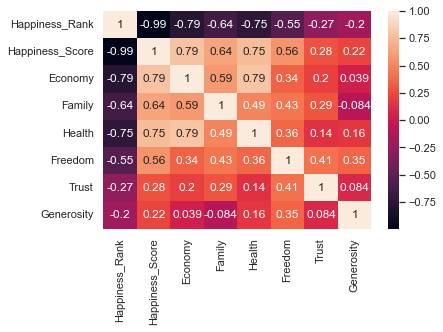

In [91]:
corr = happiness.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

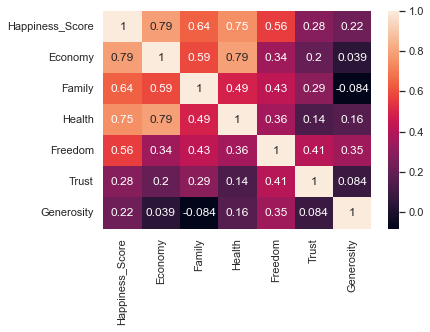

In [92]:
#### i decide to delete Happiness_Rank because it's negative higher correlate with Happiness_Score  
old_happiness = happiness
happiness.drop(['Happiness_Rank'], axis=1, inplace=True)
corr = happiness.corr()
sns.heatmap(corr, annot=True)

#### We can see that the 'Trust' and 'Generosity' are both low correlate with Happiness_Score, but i well keep them and see the results

In [96]:
data = dict(
    type = 'choropleth',
    locations = happiness['Country'],
    locationmode = 'country names',
    z = happiness['Happiness_Score'],
    text = happiness['Country'],
    colorscale = 'Viridis')

layout = dict(title = 'Happiness Score Across the world')
fig = go.Figure(data = [data], layout = layout)
iplot(fig)

## Building the model

In [106]:
happiness.drop(['Country'], axis=1, inplace=True)
X = happiness.drop(['Happiness_Score'], axis=1) # to keep only independent variables
y = happiness['Happiness_Score'] # dependent variable

X.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [108]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [109]:
y_pred = lm.predict(X_test)

In [110]:
result_lm = pd.DataFrame({
    'Actual': y_test,
    'predict' : y_pred 
})

result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,predict,Diff
122,4.324,4.921395,-0.597395
74,5.458,6.713952,-1.255952
5,7.404,6.863310,0.540690
43,6.084,5.180821,0.903179
12,7.200,6.921246,0.278754


In [111]:
# we print the intercept and coefficients for the train dataset :
print("Estimate Intercept is: ", lm.intercept_)  # 0.0001 in the vedio
print("The number of coefficients in this model are", lm.coef_) # 7 coef in the vedio

Estimate Intercept is:  2.1054366401979
The number of coefficients in this model are [1.0603278  0.75472695 1.17561459 1.5834404  0.04034988 1.13660677]
